# Face Detection using Haar Cascades.

In [1]:
import numpy as np
import cv2

print('OpenCV: ', cv2.__version__)
print('Numpy : ', np.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

OpenCV:  3.4.4
Numpy :  1.14.2


In [2]:
img = cv2.imread('./Images/boy.jpg')
print(img.shape)

(1424, 2144, 3)


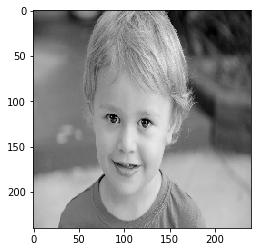

In [3]:
# Face detection using Haar - Cascade classifier
#read the Image

img = cv2.resize(img, (240,240))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('./Images/boy_gray.jpg', gray)
gray = cv2.imread('./Images/boy_gray.jpg')

#cv2.imshow('Image', img)
#cv2.waitKey(0)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(gray)
plt.show()

In [4]:
#detect Face

xml_path= '/usr/local/Cellar/opencv/3.4.1_2/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml_path)
print(face_cascade)

<CascadeClassifier 0x11424fa30>


In [5]:
# detect eyes
eye_xml = '/usr/local/Cellar/opencv/3.4.1_2/share/OpenCV/haarcascades/haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(eye_xml)

In [6]:
eye_cascade

<CascadeClassifier 0x116309810>

In [7]:
faces = face_cascade.detectMultiScale(rgb_img)

# , scaleFactor=1.1, 
#	minNeighbors=5)                                       
#minSize=(30, 30),
#flags=cv2.CASCADE_SCALE_IMAGE)

print(faces)

[[ 49  80 112 112]]


In [8]:
## draw the rectangles
for (fx, fy, fw, fh) in faces:
    print(fx, ' ', fy, ' ', fw, ' ', fh)
    cv2.rectangle(rgb_img, (fx, fy), (fx+fw, fy+fh), (0,0,255), 2)
    
    # create the region of interest to identfy the eyes
    roi_gray  = gray[fy:fy+fh, fx:fx+fw]
    roi_color = rgb_img[fy:fy+fh, fx:fx+fw]
    eyes = eye_cascade.detectMultiScale(roi_color)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,0,0), 2)



49   80   112   112
[[23 24 31 31]
 [59 31 28 28]]


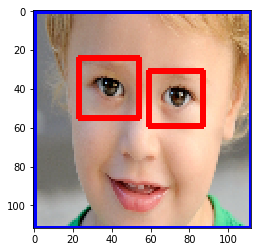

In [9]:
plt.imshow(roi_color)
plt.show()

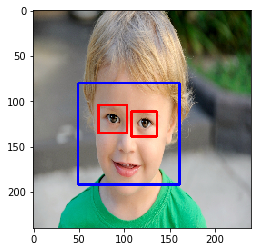

In [10]:
#plt.imshow(gray)
plt.imshow(rgb_img)
plt.show()

## Haar Cascade Smile Detection.

In [11]:
rgb_img.shape

(240, 240, 3)

In [12]:
smile_xml = '/usr/local/Cellar/opencv/3.4.1_2/share/OpenCV/haarcascades/haarcascade_smile.xml'
smile_cascade = cv2.CascadeClassifier(smile_xml)

In [13]:
smile_cascade

<CascadeClassifier 0x11609e470>

### Process the image

In [14]:
# blur the image
blur_boy_gray = cv2.GaussianBlur(gray, (5,5), 0)

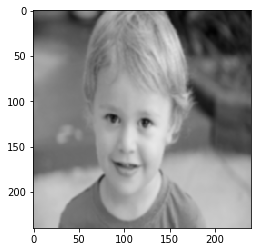

In [15]:
plt.imshow(blur_boy_gray)
plt.show()

### Get the Edges

In [16]:
# imge, threshold1 threshold2 for hysteresis procedure
boy_threshold = cv2.Canny(blur_boy_gray, 30, 150)

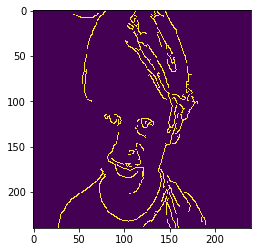

In [17]:
plt.imshow(boy_threshold)

### Detect Smile

In [18]:
#smile = smile_cascade.detectMultiScale(gray)

smile = smile_cascade.detectMultiScale(boy_threshold)

In [19]:
smile

array([[ 60, 153,  95,  47]], dtype=int32)

In [23]:
# draw the bounding box
for (x,y, w, h) in smile:
    cv2.rectangle(rgb_img, (x,y), (x+w, y+h), (0,255,255), 2)

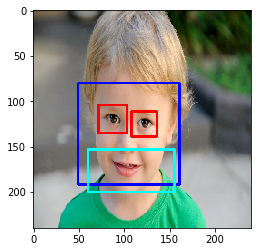

In [24]:
plt.imshow(rgb_img)
plt.show()

## License plate detection

### Read the Images

In [25]:
single_car = cv2.imread('./Images/single_car.jpg')
# convert to rgb space
single_car = cv2.cvtColor(single_car, cv2.COLOR_BGR2RGB)
single_car_gray = cv2.cvtColor(single_car,cv2.COLOR_RGB2GRAY)

# workaround
cv2.imwrite('./Images/single_car_gray.jpg', single_car_gray)
single_car_gray = cv2.imread('./Images/single_car_gray.jpg')

In [26]:
single_car.shape

(173, 292, 3)

In [27]:
two_cars = cv2.imread('./Images/two_cars.jpg')
two_cars = cv2.cvtColor(two_cars, cv2.COLOR_BGR2RGB)
two_cars_gray = cv2.cvtColor(two_cars, cv2.COLOR_RGB2GRAY)

# workaround
cv2.imwrite('./Images/two_cars_gray.jpg', two_cars_gray)
two_cars_gray = cv2.imread('./Images/two_cars_gray.jpg')

In [28]:
two_cars.shape

(158, 318, 3)

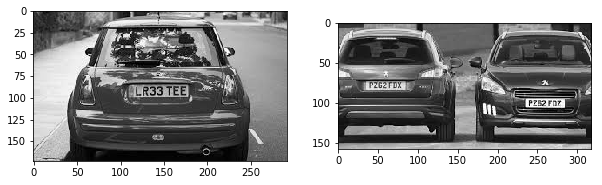

In [29]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(single_car_gray)
axes[1].imshow(two_cars_gray)
plt.show()

### Process the images

In [50]:
## blur them
single_car_blur = cv2.GaussianBlur(single_car_gray, (5,5), 0)
two_cars_blur = cv2.GaussianBlur(two_cars_gray, (5,5), 0)

In [51]:
#cars_list = [single_car_gray, two_cars_gray]
cars_list = [single_car_blur, two_cars_blur]

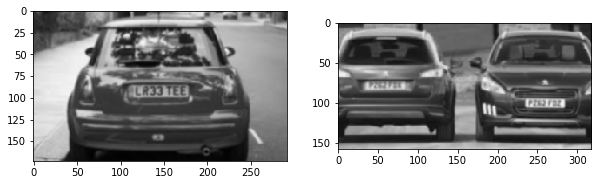

In [52]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(cars_list[0])
axes[1].imshow(cars_list[1])
plt.show()

### Identify the Edges

In [53]:
# imge, threshold1 threshold2 for hysteresis procedure
single_car_canny = cv2.Canny(car1, 30, 150)
two_cars_canny = cv2.Canny(car2, 30, 150)

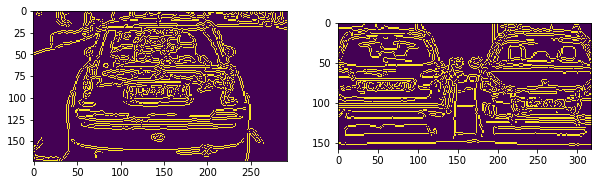

In [54]:
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(single_car_canny)
axes[1].imshow(two_cars_canny)
plt.show()

### Identify the license plates

In [55]:
license_xml = '/usr/local/Cellar/opencv/3.4.1_2/share/OpenCV/haarcascades/haarcascade_licence_plate_rus_16stages.xml'
license_cascade = cv2.CascadeClassifier(license_xml)

In [56]:
license_cascade

<CascadeClassifier 0x11e945c90>

### Go over the cars

In [61]:
def detect_license_plates(car1,car2):
    for cars in ([car1,car2]):
        print(cars.shape)
        plates = license_cascade.detectMultiScale(cars)
        print(plates)
        for (x,y,w,h) in plates:
            cv2.rectangle(cars, (x,y), (x+w, y+h), (0,0,255), 2)
        
    # plot them
    fig, axes = plt.subplots(1,2, figsize=(10,10))
    axes[0].imshow(car1)
    axes[1].imshow(car2)
    plt.show()
    return

(173, 292, 3)
()
(158, 318, 3)
()


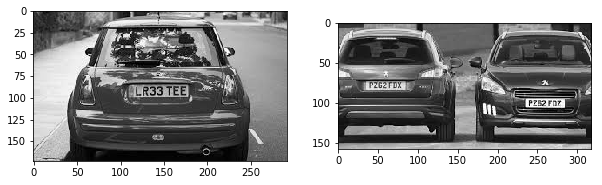

In [62]:
detect_license_plates(single_car_gray, two_cars_gray)

(173, 292, 3)
()
(158, 318, 3)
()


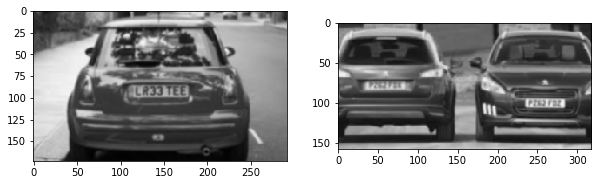

In [63]:
detect_license_plates(single_car_blur, two_cars_blur)

(173, 292)
()
(158, 318)
()


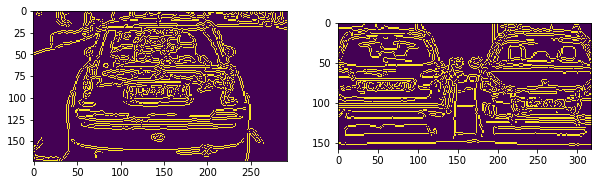

In [64]:
detect_license_plates(single_car_canny, two_cars_canny)

(173, 292, 3)
()
(158, 318, 3)
()


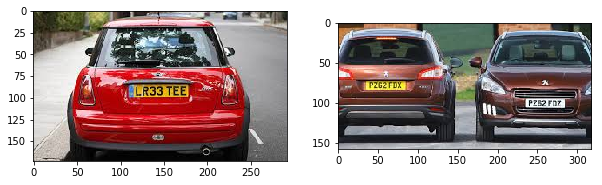

In [65]:
detect_license_plates(single_car, two_cars)